In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")


In [23]:
df=pd.read_csv('Occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [24]:
df=df[['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']]
df.head()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 963.9 KB


In [26]:
class_counts = df['Occupancy'].value_counts()
class_counts

Occupancy
0    15810
1     4750
Name: count, dtype: int64

In [27]:
class_a_data = df[df['Occupancy'] == 0]
class_a_data

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
195,22.60,25.066667,428.333333,849.333333,0.004250,0
196,22.60,25.200000,422.500000,853.000000,0.004272,0
197,22.60,25.200000,423.666667,853.000000,0.004272,0
198,22.54,25.160000,424.600000,852.000000,0.004250,0
199,22.54,25.160000,427.400000,853.600000,0.004250,0
...,...,...,...,...,...,...
20546,20.79,26.790000,10.000000,1450.500000,0.004065,0
20547,20.84,26.840000,12.000000,1446.500000,0.004085,0
20548,20.79,26.790000,14.000000,1444.666667,0.004065,0
20549,20.79,26.767500,10.000000,1455.000000,0.004061,0


<Axes: xlabel='Occupancy', ylabel='count'>

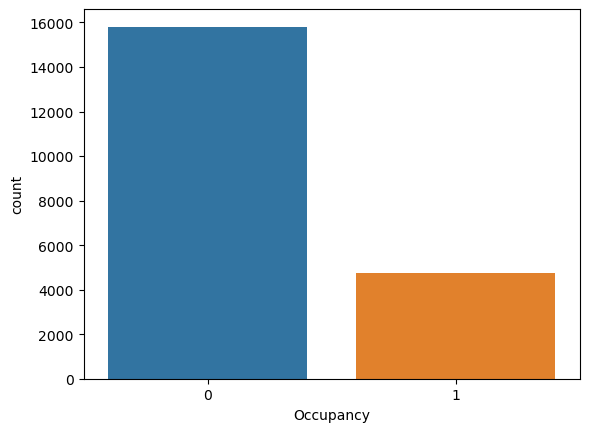

In [28]:
sns.countplot(x="Occupancy", data=df)

,Temperature,HumidityRatio,Light,CO2,Humidity,Occupancy
Temperature,1.000000,0.205280,0.688571,0.449989,-0.156964,0.555610
HumidityRatio,0.205280,1.000000,0.223329,0.477965,0.932724,0.257324
Light,0.688571,0.223329,1.000000,0.448105,-0.029459,0.914850
CO2,0.449989,0.477965,0.448105,1.000000,0.299746,0.501582
Humidity,-0.156964,0.932724,-0.029459,0.299746,1.000000,0.046240
Occupancy,0.555610,0.257324,0.914850,0.501582,0.046240,1.000000


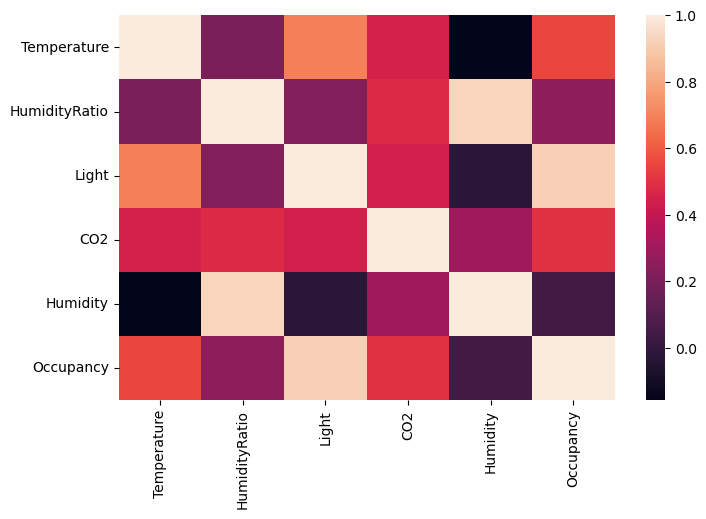

In [29]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
numerical = list(set(df.columns)- {"date"})
corr_matrix = df[numerical].corr()
display(corr_matrix)

sns.heatmap(corr_matrix,ax=axes);

In [30]:
X=df.drop('Occupancy',axis=1)
Y=df['Occupancy']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [31]:
###Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [32]:
modelTitle='Logistic Regression'
print('Accuracy of ',modelTitle,' Classifier on test set: {:.6f}%'.format((log_reg.score(X_test, Y_test)*100)))

Accuracy of  Logistic Regression  Classifier on test set: 98.589494%


In [33]:
###DecisionTreeClassifier
Dec_tree = DecisionTreeClassifier()
Dec_tree.fit(X_train,Y_train)
modelTitle='DecisionTreeClassifier'
print('Accuracy of ',modelTitle,' Classifier on test set: {:.6f}%'.format((Dec_tree.score(X_test, Y_test)*100)))

Accuracy of  DecisionTreeClassifier  Classifier on test set: 99.027237%


In [34]:
###RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators= 10)
rand_forest .fit(X_train,Y_train)
modelTitle='RandomForestClassifier'
print('Accuracy of ',modelTitle,' Classifier on test set: {:.6f}%'.format((rand_forest .score(X_test, Y_test)*100)))

Accuracy of  RandomForestClassifier  Classifier on test set: 99.319066%


In [35]:
###Naive Bayes
nave = GaussianNB()
nave .fit(X_train,Y_train)
modelTitle='Naive Bayes'
print('Accuracy of ',modelTitle,' Classifier on test set: {:.6f}%'.format((nave .score(X_test, Y_test)*100)))

Accuracy of  Naive Bayes  Classifier on test set: 96.376459%


In [36]:
###Support Vector Machine
support = SVC(probability=True)
support .fit(X_train,Y_train)
modelTitle='Support Vector Machine'
print('Accuracy of ',modelTitle,' Classifier on test set: {:.6f}%'.format((support .score(X_test, Y_test)*100)))

Accuracy of  Support Vector Machine  Classifier on test set: 98.589494%


In [37]:
y_pred=support.predict(X_test)
y_pred,Y_test

(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 14756    0
 19000    0
 18894    0
 8541     0
 9602     0
         ..
 15431    0
 3722     1
 9714     1
 8051     0
 6045     0
 Name: Occupancy, Length: 4112, dtype: int64)

In [38]:
X

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.7000,26.2720,585.200000,749.200000,0.004764
1,23.7180,26.2900,578.400000,760.400000,0.004773
2,23.7300,26.2300,572.666667,769.666667,0.004765
3,23.7225,26.1250,493.750000,774.750000,0.004744
4,23.7540,26.2000,488.600000,779.000000,0.004767
...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213
20556,20.8650,27.7450,423.500000,1514.500000,0.004230
20557,20.8900,27.7450,423.500000,1521.500000,0.004237
20558,20.8900,28.0225,418.750000,1632.000000,0.004279


In [39]:
import pickle
rand={'model':rand_forest}
sup={'model':support}
log={'model':log_reg}
dec={'model':Dec_tree}
nave={'model':nave}

with open('saved_pikle.pkl','wb') as file:
    pickle.dump(rand, file)
    pickle.dump(sup, file)
    pickle.dump(log, file)
    pickle.dump(dec, file)
    pickle.dump(nave, file)
    

In [40]:
with open('saved_pikle.pkl','rb') as file:
    data=pickle.load(file)
model_loaded=data['model']

In [41]:
y_pred=model_loaded.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)